In [ ]:
!nvidia-smi

Tue Mar 29 04:54:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
train_generator=train_datagen.flow_from_directory("/content/drive/MyDrive/Vegetable_Classification/train",target_size=(224, 224),batch_size=32,class_mode='categorical',subset='training')
validation_generator=train_datagen.flow_from_directory("/content/drive/MyDrive/Vegetable_Classification/train",target_size=(224, 224),batch_size=16,class_mode='categorical',subset='validation')

Found 12008 images belonging to 15 classes.
Found 3002 images belonging to 15 classes.


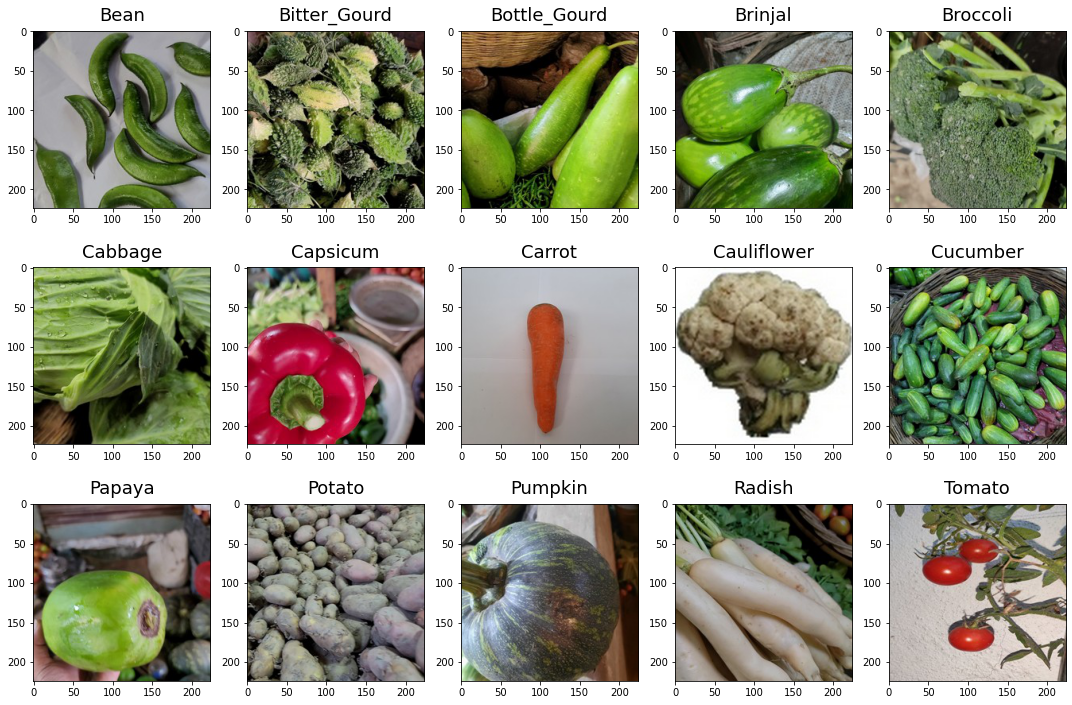

In [ ]:
import os 
import matplotlib.pyplot as plt
train_folder="/content/drive/MyDrive/Vegetable_Classification/train"
images = []
for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))                                     
fig=plt.figure(1, figsize=(15, 10))
for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)    
plt.tight_layout()

In [ ]:
vgg=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
for layer in vgg.layers:
  layer.trainable = False
x=tf.keras.layers.Flatten()(vgg.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
prediction=tf.keras.layers.Dense(15, activation='softmax')(x)
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)
model.load_weights("/content/drive/MyDrive/Vegetable_Classification/TL_TF_VGG.h5")
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
checkpoint_filepath_a="/content/drive/MyDrive/Vegetable_Classification/TL_TF_VGG.h5"
checkpoint_a=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath_a, mode='min', monitor='val_loss', verbose=0, save_best_only=True,save_weights_only=True)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),cooldown=0,patience=5,min_lr=0.5e-6)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(train_generator,validation_data=validation_generator, epochs=100, verbose=1,  callbacks=[checkpoint_a,lr_reducer])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
376/376 [==============================] - 4025s 11s/step - loss: 2.1717 - accuracy: 0.5490 - val_loss: 0.7281 - val_accuracy: 0.8141 - lr: 0.0010
Epoch 2/100
376/376 [==============================] - 272s 722ms/step - loss: 0.9133 - accuracy: 0.7488 - val_loss: 0.5025 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 3/100
376/376 [==============================] - 270s 718ms/step - loss: 0.6835 - accuracy: 0.8130 - val_loss: 0.3574 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 4/100
376/376 [==============================] - 268s 712ms/step - loss: 0.6106 - accuracy: 0.8323 - val_loss: 0.2647 - val_accuracy: 0.9290 - lr: 0.0010
Epoch 5/100
376/376 [==============================] - 268s 713ms/step - loss: 0.5589 - accuracy: 0.8427 - val_loss: 0.2547 - val_accuracy: 0.9490 - lr: 0.0010
Epoch 6/100
376/376 [==============================] - 269s 714ms/step - loss: 0.5065 - accuracy: 0.8585 - val_loss: 0.2166 - val_accuracy: 0.9537 - lr: 0.0010
Epoch 7/100
376/376 [====================

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(train_generator,validation_data=validation_generator, epochs=50, verbose=1, callbacks=[checkpoint_a,lr_reducer])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
376/376 [==============================] - 3726s 10s/step - loss: 0.3222 - accuracy: 0.9248 - val_loss: 0.1556 - val_accuracy: 0.9727 - lr: 0.0010
Epoch 2/50
376/376 [==============================] - 266s 708ms/step - loss: 0.3491 - accuracy: 0.9098 - val_loss: 0.2356 - val_accuracy: 0.9654 - lr: 0.0010
Epoch 3/50
376/376 [==============================] - 263s 700ms/step - loss: 0.3703 - accuracy: 0.9156 - val_loss: 0.1781 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 4/50
376/376 [==============================] - 265s 704ms/step - loss: 0.3524 - accuracy: 0.9224 - val_loss: 0.1709 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 5/50
376/376 [==============================] - 265s 705ms/step - loss: 0.3277 - accuracy: 0.9253 - val_loss: 0.3385 - val_accuracy: 0.9710 - lr: 0.0010
Epoch 6/50
376/376 [==============================] - 267s 710ms/step - loss: 0.3259 - accuracy: 0.9299 - val_loss: 0.1678 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 7/50
376/376 [===========================

In [ ]:
def return_model():
  vgg=tf.keras.applications.vgg16.VGG16(include_top=False, weights=None,input_shape=(224,224,3))
  x=tf.keras.layers.Flatten()(vgg.output)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x=tf.keras.layers.Dropout(0.2)(x)
  prediction=tf.keras.layers.Dense(15, activation='softmax')(x)
  model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)
  return model
trained_model=return_model()
trained_model.load_weights("/content/drive/MyDrive/Vegetable_Classification/TL_TF_VGG.h5")
trained_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def predict_image(filename,model):
    img_ = tf.keras.preprocessing.image.load_img(filename, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)  
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    #plt.title("Prediction - {}".format(category[index]))
    #plt.imshow(img_array)
    return index

def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    true=filedir.split('/')[-1]
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
    for subplot, imggg in enumerate(images):
        index = predict_image(imggg,model)
        pred=category.get(index)
        if pred==true:
            pos+=1
    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

In [ ]:
validation_folder="/content/drive/MyDrive/Vegetable_Classification/test"
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),trained_model)

Accuracy for Potato: 1.00 (200/200)
Accuracy for Radish: 1.00 (200/200)
Accuracy for Carrot: 1.00 (200/200)
Accuracy for Pumpkin: 0.99 (198/200)
Accuracy for Cucumber: 0.99 (198/200)
Accuracy for Capsicum: 1.00 (200/200)
Accuracy for Papaya: 0.97 (195/200)
Accuracy for Cabbage: 1.00 (200/200)
Accuracy for Cauliflower: 0.99 (199/200)
Accuracy for Tomato: 1.00 (200/200)
Accuracy for Broccoli: 1.00 (200/200)
Accuracy for Bean: 0.99 (199/200)
Accuracy for Bottle_Gourd: 1.00 (200/200)
Accuracy for Bitter_Gourd: 0.99 (198/200)
Accuracy for Brinjal: 0.98 (196/200)


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
def labels_confusion_matrix(validation_folder,model):
    folder_path=validation_folder
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    files=[]
    real=[]
    predicted=[]
    for i in os.listdir(folder_path):
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        for j in os.listdir(os.path.join(folder_path,i)):
            index=predict_image(os.path.join(folder_path,i,j),model)
            predicted.append(index)
            real.append(true)     
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="YlGnBu"
    cm_plot_labels = [i for i in range(15)]
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(cm,fmt="d", annot=True,cmap=cmap) # font size
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy : 0.9943333333333333


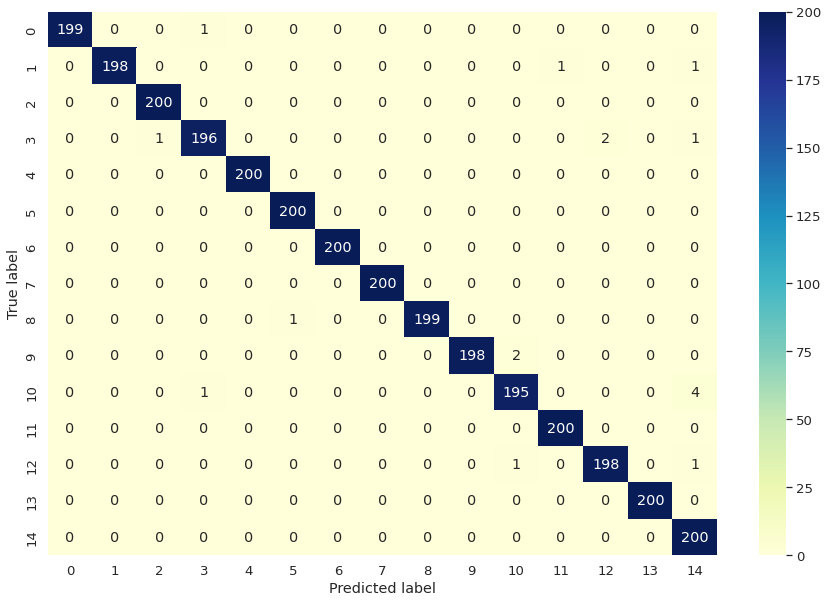

In [ ]:
y_true,y_pred=labels_confusion_matrix(validation_folder,trained_model)
print(f"Accuracy : {accuracy_score(y_true,y_pred)}")
print_confusion_matrix(y_true,y_pred)